## Titanic dataset from Kaggle

Questions:
1. who were the passengers on the Titanic
2. what deck were they on 
3. where did the passengers come from
4. did they have family on board or were they alone
5. what factors helped someone survive

In [395]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [396]:
file = r'I:\Market Planning\Revenue and Sales Analysis\Individual Folders\Janine\resources\Python\Titanic\train.csv'

In [397]:
titanic_df = pd.read_csv(file)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [398]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Pclass', ylabel='count'>

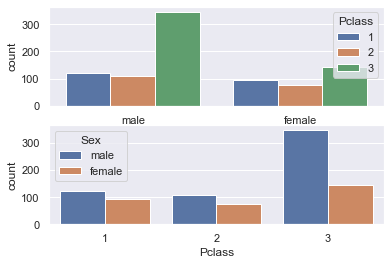

In [399]:
f,(axis1,axis2) = plt.subplots(2,1)
sns.countplot(x='Sex',data=titanic_df, hue='Pclass', ax = axis1) # factorplot is deprecated, use catplot instead
sns.countplot(x='Pclass',data=titanic_df, hue='Sex', ax = axis2)

In [400]:
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16: 
        return 'child'
    else:
        return sex

In [401]:
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis =1) # create new column to indicate child based on age & sex

In [402]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


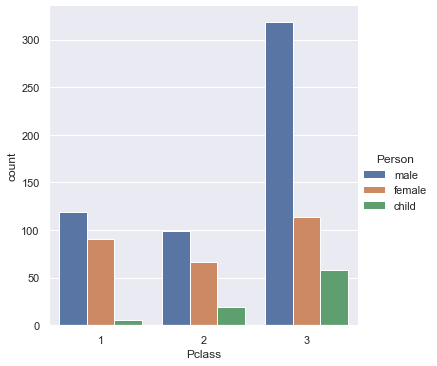

In [403]:
sns.catplot(x='Pclass', data=titanic_df, hue='Person', kind='count')

<AxesSubplot:>

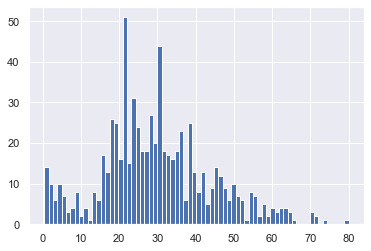

In [404]:
# histogram of 'Age'
titanic_df['Age'].hist(bins=70)

In [405]:
# calculate mean age
titanic_df['Age'].mean()

29.69911764705882

In [406]:
# count of male/female/child passengers
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

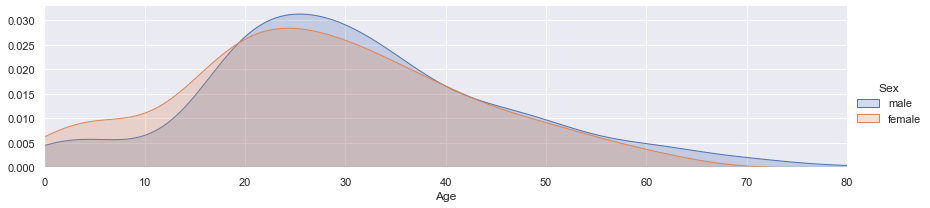

In [407]:
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot,'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

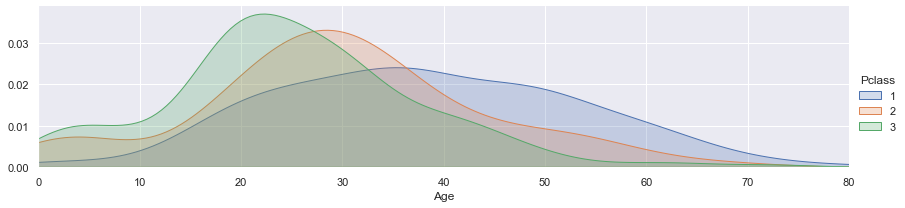

In [408]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot,'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [409]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [410]:
deck = titanic_df['Cabin'].dropna()

In [411]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

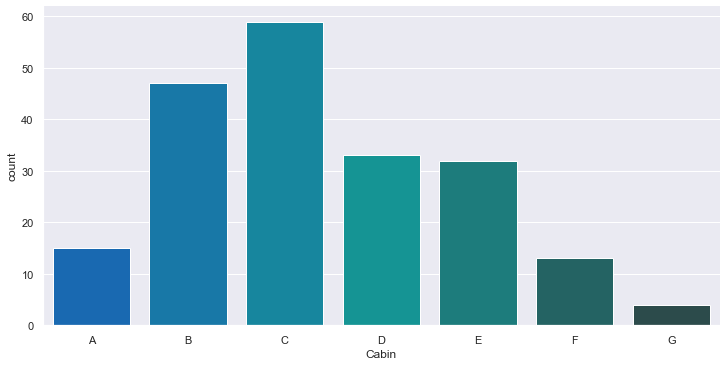

In [433]:
# isolate first letter of the deck by creating a list called levels
levels = []
for level in deck:
    levels.append(level[0]) # [0] refers to first item in string
    
cabin_df = pd.DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot(x='Cabin',data=cabin_df, kind='count', palette='winter_d', aspect=2, order=['A','B','C','D','E','F','G'])


## check out different matplotlib colormaps at
https://matplotlib.org/tutorials/colors/colormaps.html 

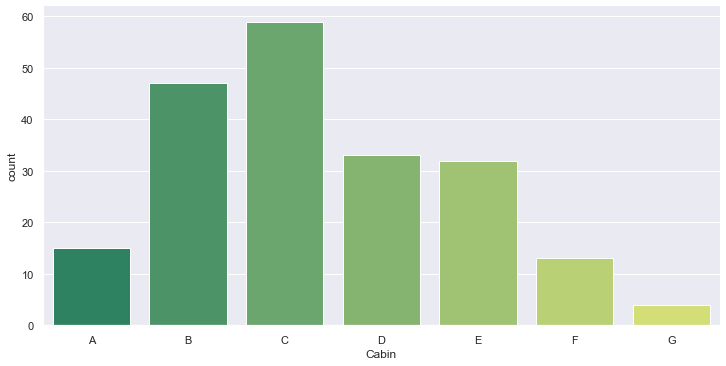

In [432]:
# remove cabin 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.catplot(x='Cabin',data=cabin_df, kind='count', palette='summer', aspect=2, order=['A','B','C','D','E','F','G'])

In [414]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


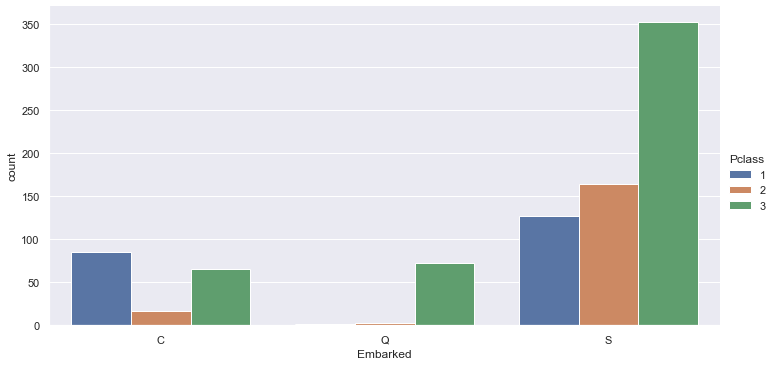

In [415]:
# where did pax come from?

sns.catplot(x='Embarked', data=titanic_df, kind='count', aspect=2, hue='Pclass', order=['C','Q','S'])

# cities = Southampton, Queenstown and Cherbord

In [416]:
# did passengers have family on board or were they alone (using columns 'SibSp'= siblings/spouse and 'Parch' = parents/children)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [417]:
# create new column to define alone
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch # if this column is <> 0 then they had family on board

In [418]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With family'

titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

# ignore warning below

c:\program files\python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [419]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


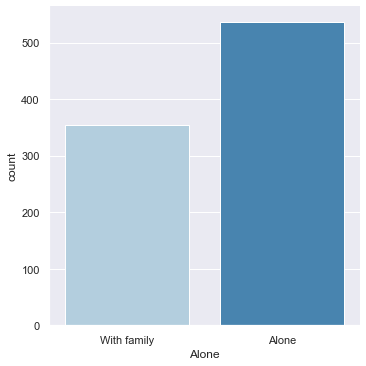

In [420]:
sns.catplot(x='Alone', data=titanic_df, kind='count', palette='Blues')

<AxesSubplot:xlabel='Survivor', ylabel='count'>

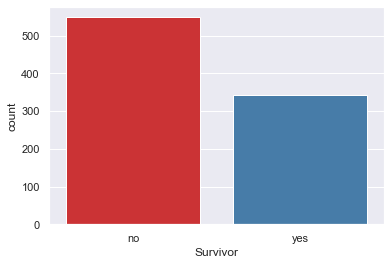

In [421]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

sns.countplot(x='Survivor', data=titanic_df, palette='Set1')

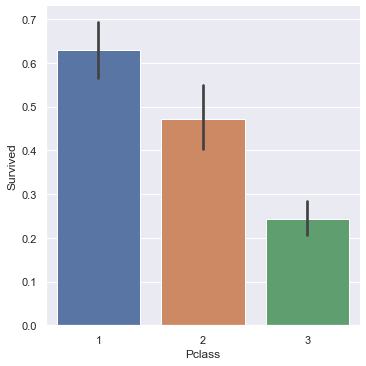

In [422]:
sns.catplot(x='Pclass',y='Survived',data=titanic_df, kind='bar') 
# shows that passengers in 3rd class were least likely to survive... is that because they were mostly men?

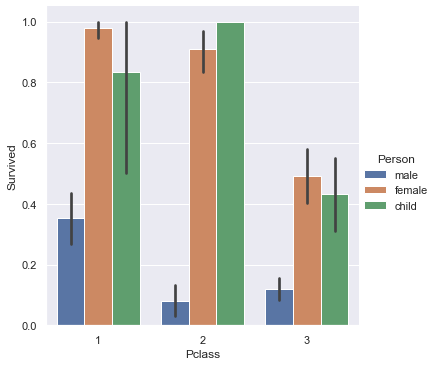

In [423]:
sns.catplot(x='Pclass',y='Survived',data=titanic_df, kind='bar', hue='Person') # shows that women and children were more 
# likely to survive regardless of class, however men in 1st class were more likely to survive than men in 2nd or 3rd class

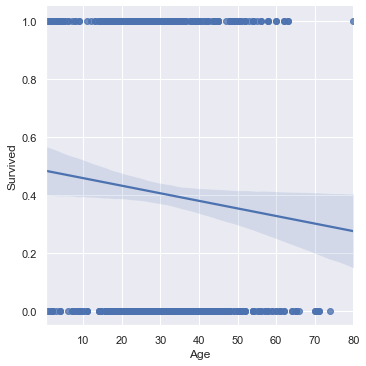

In [424]:
sns.lmplot(x='Age',y='Survived', data=titanic_df) # older passengers were less likely to survive

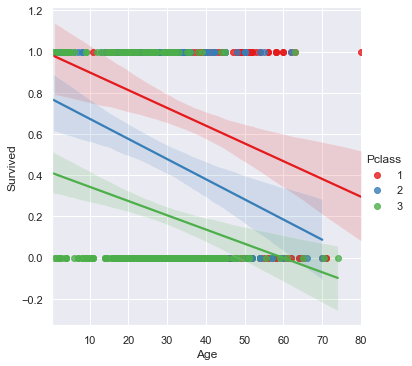

In [425]:
sns.lmplot(x='Age',y='Survived', data=titanic_df, hue='Pclass', palette='Set1')

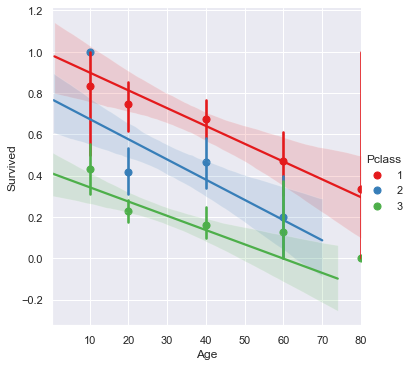

In [426]:
# make chart a bit tidier by binning ages into generations
generations = [10,20,40,60,80]
sns.lmplot(x='Age', y='Survived', hue='Pclass', data=titanic_df, palette='Set1', x_bins=generations)

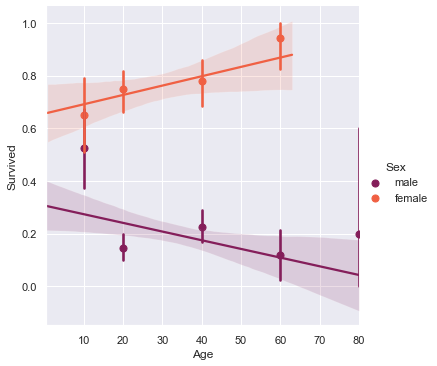

In [427]:
# make chart a bit tidier by binning ages into generations
generations = [10,20,40,60,80]
sns.lmplot(x='Age', y='Survived', hue='Sex', data=titanic_df, palette='rocket', x_bins=generations)

1. did the deck have an effect on the passengers survival rate? did this answer match up with your intuition?
2. did having a family member increase the odds of surviving?

In [428]:
titanic_df['Deck'] = titanic_df['Cabin'].astype(str).str[0]
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family,no,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family,yes,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,n


In [429]:
deck_df = titanic_df[titanic_df.Deck != 'n']
deck_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family,yes,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family,yes,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,no,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,With family,yes,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone,yes,C


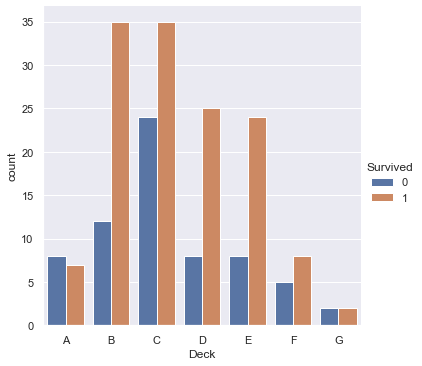

In [438]:
# effect of deck on survival --> highest chance of survival in decks B, D and E (probably due to location on board? or more women/children?)
# however, limited data set

sns.catplot(x='Deck', hue='Survived', data=deck_df, kind='count', order=['A','B','C','D','E','F','G'])

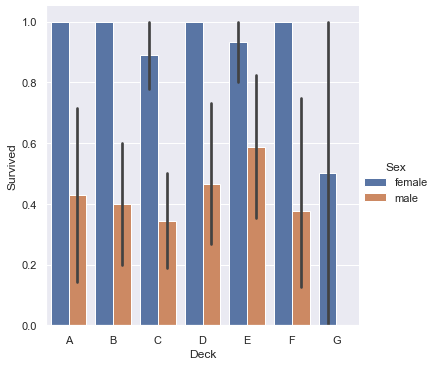

In [473]:
sns.catplot(x='Deck',y='Survived',data=deck_df, hue='Sex', kind='bar', order=['A','B','C','D','E','F','G']) 
# men only had slightly better chance of survival in decks D & E but not so much B

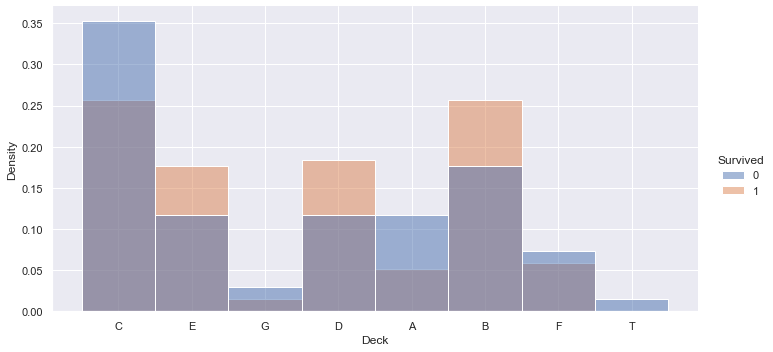

In [470]:
# effect of family on survial --> those with family on board were more likely to survive
sns.displot(x='Deck', hue='Survived', data=deck_df, stat='density', common_norm=False, aspect=2)

<AxesSubplot:xlabel='Alone', ylabel='Density'>

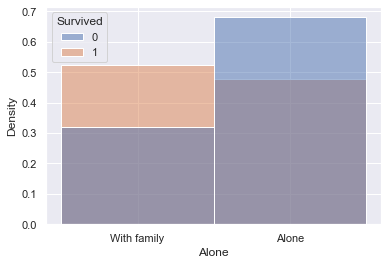

In [446]:
# effect of family on survial --> those with family on board were more likely to survive
sns.histplot(x='Alone', hue='Survived', data=titanic_df, stat='density', common_norm=False)

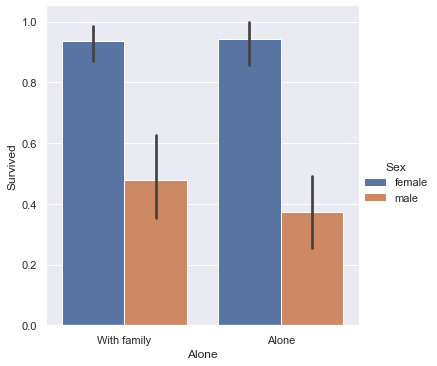

In [479]:
sns.catplot(x='Alone',y='Survived',data=deck_df, hue='Sex', kind='bar') 
# men had a slightly better chance of survival if they had family on board, for women it made no difference

# my own charts

<AxesSubplot:xlabel='Alone', ylabel='Count'>

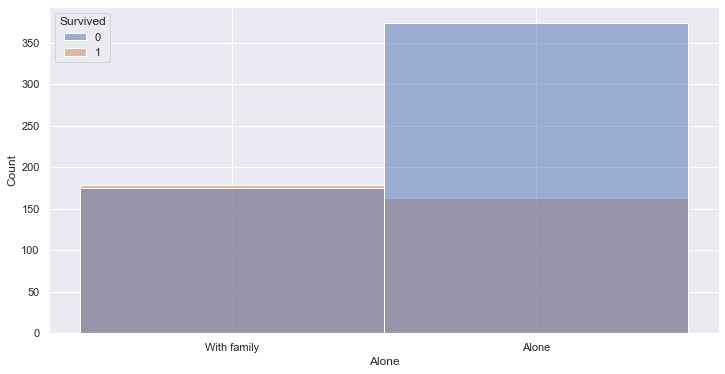

In [260]:
sns.histplot(x='Alone', data=titanic_df, hue='Survived')

<AxesSubplot:xlabel='Alone', ylabel='Count'>

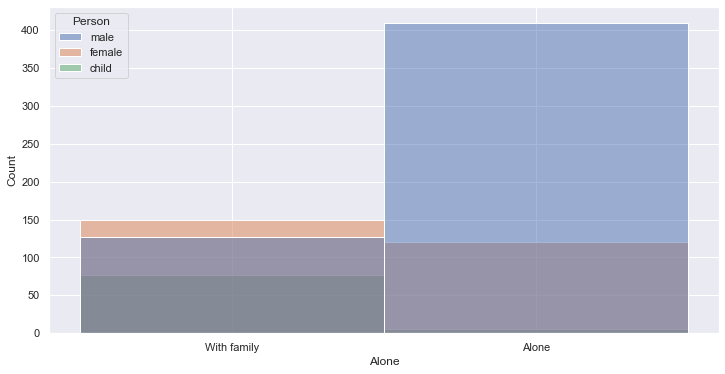

In [259]:
sns.histplot(x='Alone', data=titanic_df, hue='Person')

Text(0.5, 1.0, 'Split of survivors vs non-survivors')

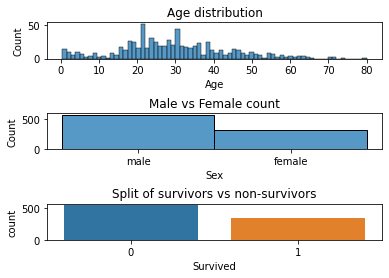

In [144]:
f, (axis1,axis2,axis3) = plt.subplots(3,1)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1.5)
sns.histplot(x='Age', data = titanic_df, ax=axis1, bins=70).set_title("Age distribution")
sns.histplot(x='Sex', data = titanic_df, ax=axis2).set_title("Male vs Female count")
sns.countplot(x='Survived', data = titanic_df, ax=axis3).set_title("Split of survivors vs non-survivors")

<AxesSubplot:xlabel='Fare', ylabel='Count'>

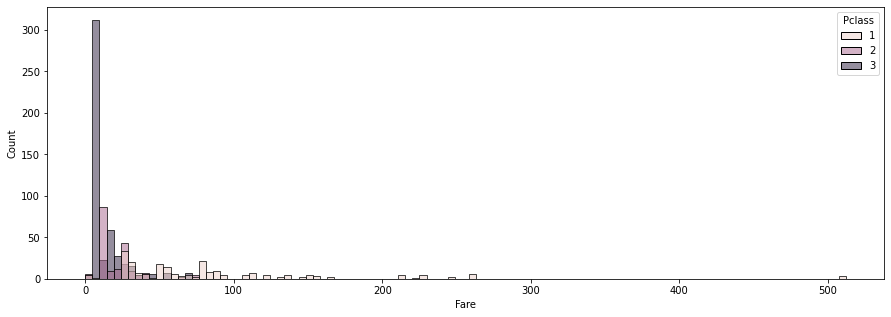

In [145]:
# distribution of fares by Pclass
plt.figure(figsize=(15,5))
sns.histplot(x='Fare', data=titanic_df, hue='Pclass')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

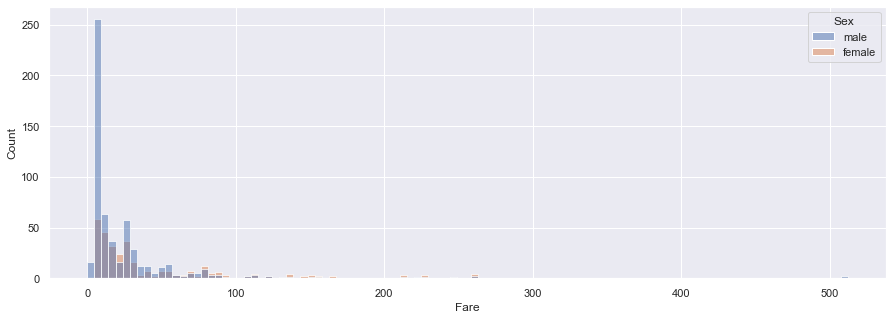

In [272]:
# distribution of fares by Pclass
plt.figure(figsize=(15,5))
sns.histplot(x='Fare', data=titanic_df, hue='Sex')

(0.0, 100.0)

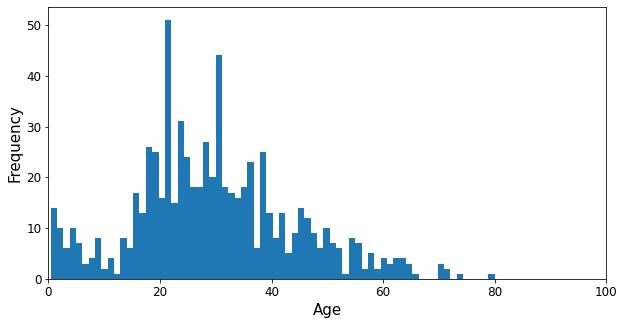

In [146]:
# histogram with matplotlib
plt.figure(figsize=(10,5))
titanic_df['Age'].hist(bins=70, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.xlim([0,100.0])

Text(0, 0.5, 'Frequency')

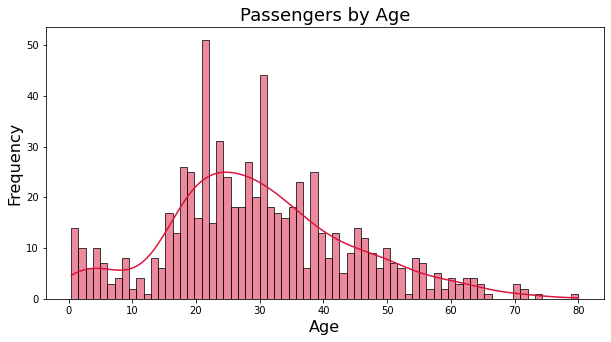

In [147]:
# histogram with seaborn (incl. KDE)
plt.figure(figsize=(10,5))
sns.histplot(titanic_df['Age'], kde=True, color='Crimson', bins=70)
plt.title('Passengers by Age', fontsize=18)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [148]:
print(type(titanic_df))

<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:xlabel='Age', ylabel='Count'>

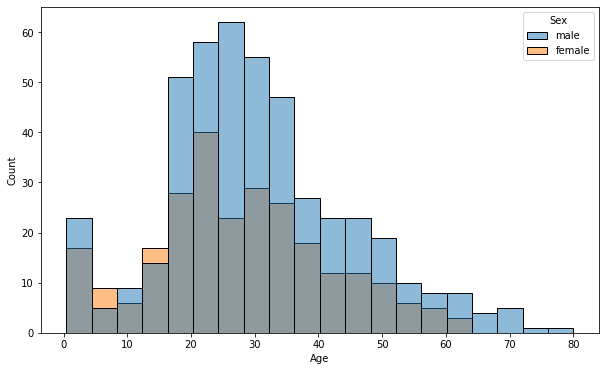

In [160]:
# use hue to overlay different categories (e.g. Sex)
plt.figure(figsize=(10,6))
sns.histplot(titanic_df, x="Age", hue='Sex') #plt.figure(figsize) doesn't seem to work for displot

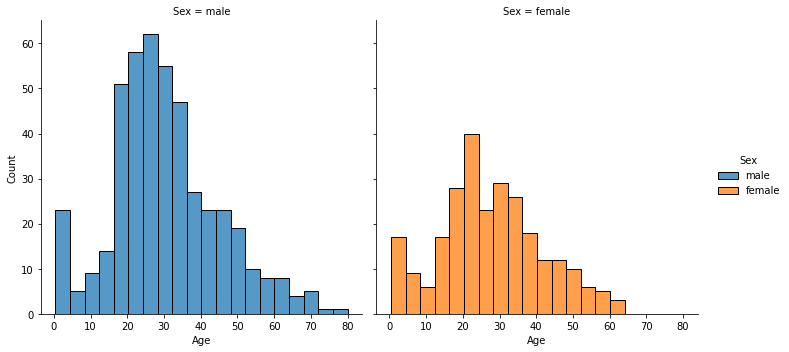

In [171]:
sns.displot(titanic_df, x="Age", col="Sex", hue='Sex') # use col to show charts next to each other

### Normalized histogram statistics
When subsets have unequal numbers of observations (as above, where there are a lot more males than females), comparing their distributions in terms of counts may not be ideal. One solution is to normalize the counts using the stat parameter. 
By default, however, the normalization is applied to the entire distribution, so this simply rescales the height of the bars. By setting common_norm=False, each subset will be normalized independently.

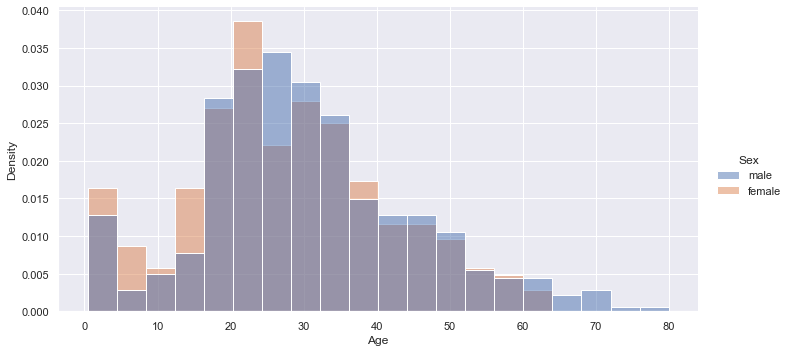

In [445]:
# to normalise histogram use 'stat' and 'common_norm' (when a lot more observations in one category, e.g. a lot more men travelled on the Titanic)
sns.displot(titanic_df, x="Age", hue="Sex", stat="density" , common_norm=False, aspect=2) # use aspect to set size for displot

### Kernel density estimation
A histogram aims to approximate the underlying probability density function that generated the data by binning and counting observations. Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate:

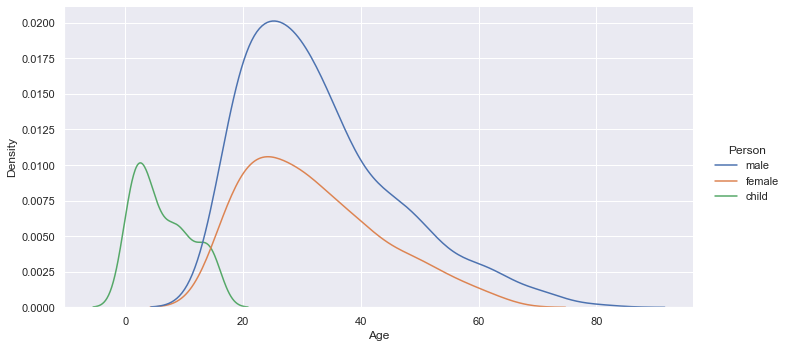

In [196]:
sns.displot(titanic_df, x='Age', hue='Person', kind="kde", aspect=2)

### Choosing the smoothing bandwidth
Much like with the bin size in the histogram, the ability of the KDE to accurately represent the data depends on the choice of smoothing bandwidth. An over-smoothed estimate might erase meaningful features, but an under-smoothed estimate can obscure the true shape within random noise. The easiest way to check the robustness of the estimate is to adjust the default bandwidth:

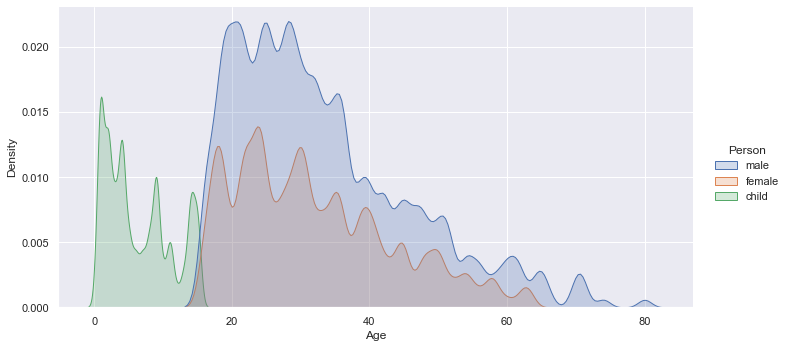

In [197]:
sns.displot(titanic_df, x='Age', hue='Person', kind="kde", bw_adjust=.25, aspect=2, fill=True) # use fill=True to fill the area below the line

<AxesSubplot:xlabel='Age', ylabel='Density'>

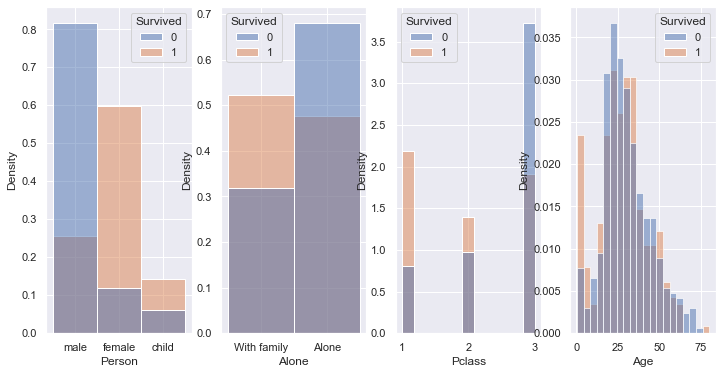

In [269]:
f, (axis1,axis2,axis3,axis4) = plt.subplots(1,4)
# use density and common_norm to adjust for fact that a lot more passengers were male
sns.histplot(x='Person', data=titanic_df, hue='Survived', ax=axis1, stat="density" , common_norm=False)
sns.histplot(x='Alone', data=titanic_df, hue='Survived', ax=axis2, stat="density" , common_norm=False)
sns.histplot(x='Pclass', data=titanic_df, hue='Survived', ax=axis3, stat="density" , common_norm=False)
sns.histplot(x='Age', data=titanic_df, hue='Survived', ax=axis4, stat="density" , common_norm=False)

### conclusion/hypothesis: passengers were more likely to survive if they were:

1. female or children
2. travelling with family increased mens' chances of survival but had no impact on womens' chances of survival
3. travelling in first or second class (men in 2nd and 3rd class were equally unlikely to survive but 1st class had higher survival rate)